In [1]:
#https://atmamani.github.io/projects/ml/sklearn_statmodels_linear_regression/
from scipy import stats
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import pandas as pd
import statistics
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import patsy
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/bdfc59ed-c3c7-48ac-a3d3-9e54663f6c1d.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h1>Analyse rapide des données</h1>

In [3]:
df.shape

(1460, 81)

In [4]:
#df.info()

In [5]:
#df.isnull().sum().head(50)

In [6]:
# profile = ProfileReport(df, title="Pandas Profiling Report Train from House Prices")
# profile

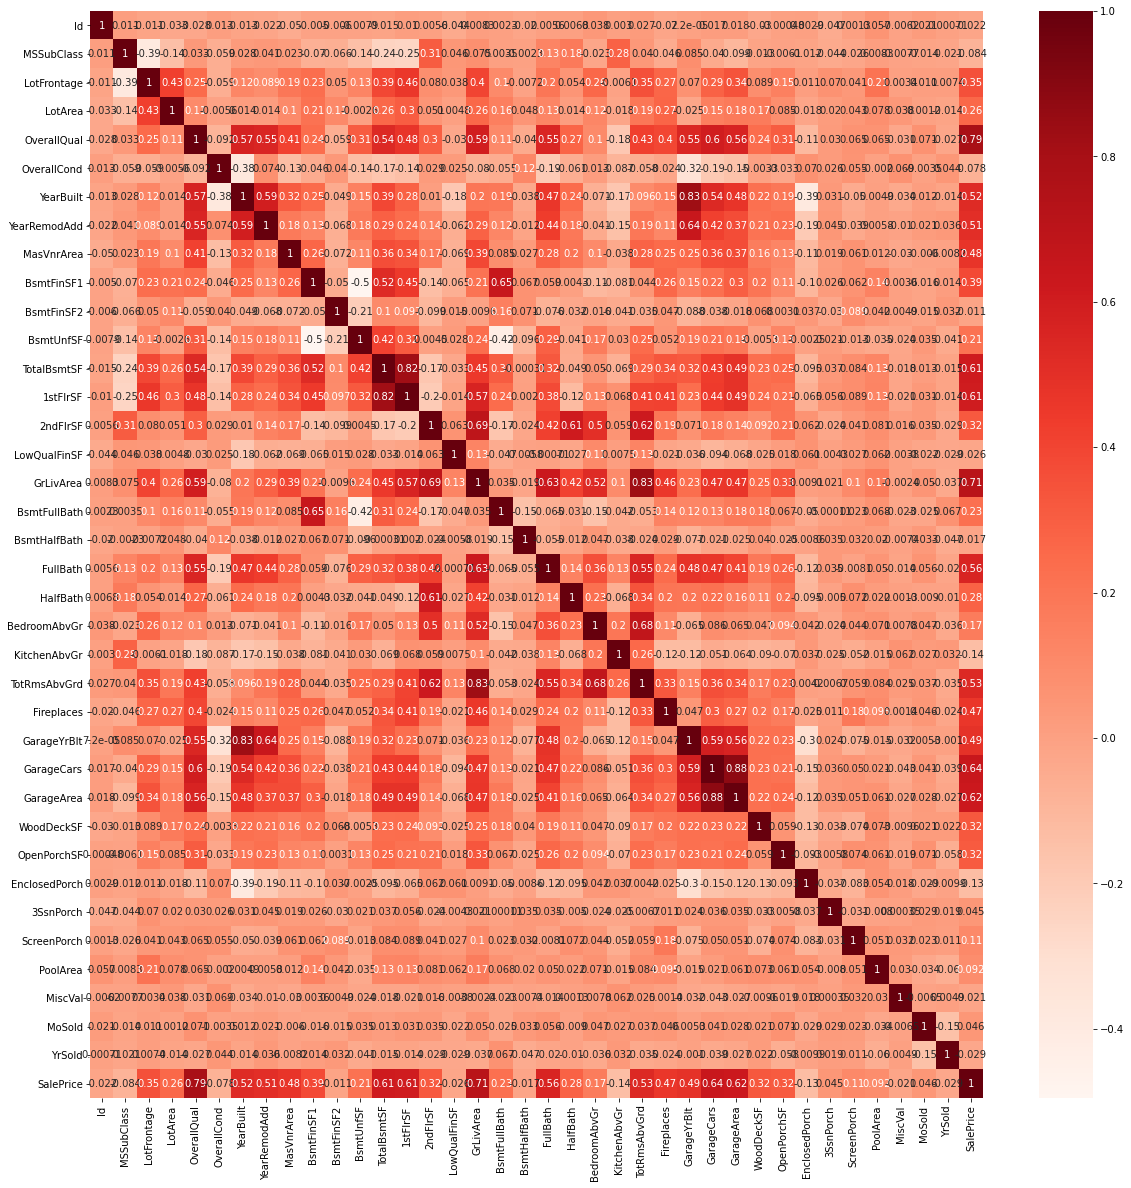

In [7]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
df_new = df[['SalePrice','1stFlrSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea','OverallQual']].rename(columns={'1stFlrSF': 'FirstFloor'})
df_new.describe()

,SalePrice,FirstFloor,TotalBsmtSF,GrLivArea,GarageArea,OverallQual
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1162.626712,1057.429452,1515.463699,472.980137,6.099315
std,79442.502883,386.587738,438.705324,525.480383,213.804841,1.382997
min,34900.000000,334.000000,0.000000,334.000000,0.000000,1.000000
25%,129975.000000,882.000000,795.750000,1129.500000,334.500000,5.000000
50%,163000.000000,1087.000000,991.500000,1464.000000,480.000000,6.000000
75%,214000.000000,1391.250000,1298.250000,1776.750000,576.000000,7.000000
max,755000.000000,4692.000000,6110.000000,5642.000000,1418.000000,10.000000


In [9]:
#sns.pairplot(df_new)

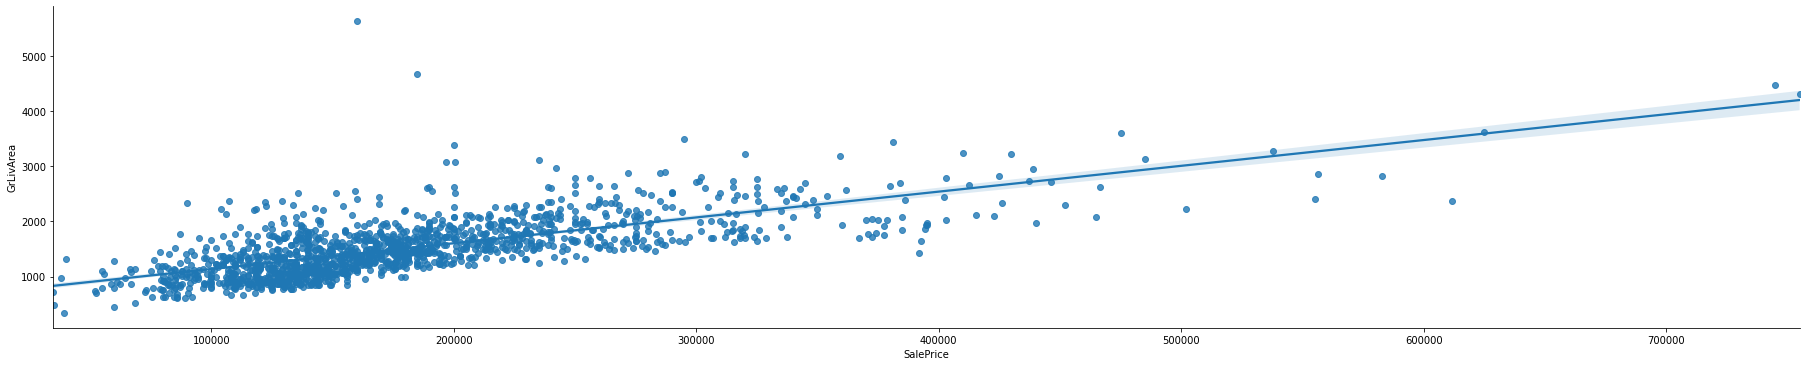

In [10]:
sns.lmplot(data=df_new, x='SalePrice', y='GrLivArea', height=5, aspect=5)

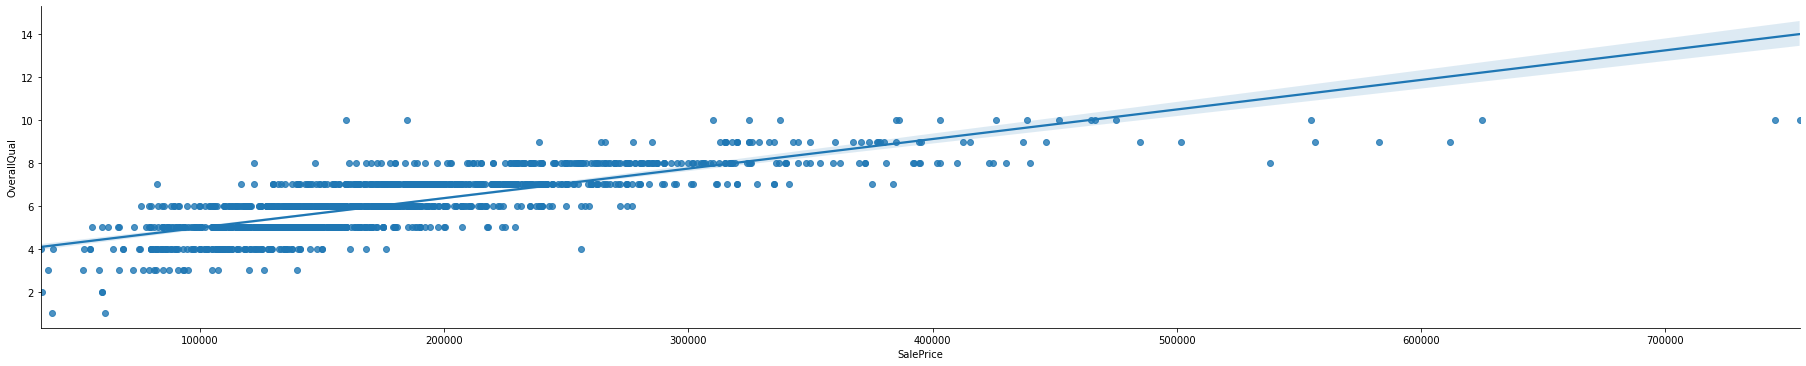

In [11]:
sns.lmplot(data=df_new, x='SalePrice', y='OverallQual', height=5, aspect=5)

# STATSMODELS PREDICTIONS

In [12]:
X = df_new["OverallQual"]
X = np.vander(X, 2) 
y = df_new["SalePrice"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sun, 23 May 2021   Prob (F-statistic):          2.19e-313
Time:                        10:04:38   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.544e+04    920.430     49.364      0.0

In [13]:
mod = smf.ols(formula='SalePrice ~ OverallQual + GrLivArea', data=df_new).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1820.
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        10:04:38   Log-Likelihood:                -17630.
No. Observations:                1460   AIC:                         3.527e+04
Df Residuals:                    1457   BIC:                         3.528e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.041e+05   5045.372    -20.631      0.000   -1.14e+05   -9.42e+04
OverallQual  3.285e+04    999.198     32.875      0.000    3.09e+04    3.48e+04
GrLivArea      55.8622      2.630     21.242      0.000      50.704      61.021
==============================================================================
Omnibus:                      341.985   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8725.150
Skew:                           0.469   Prob(JB):                         0.00
Kurtosis:                      14.939   Cond. No.                     7.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
print(mod.params['Intercept'])
print(mod.params['OverallQual'])
print(mod.params['GrLivArea'])
print(mod.rsquared)

-104092.66963598144
32849.04744062516
55.862225906605715
0.7141732234458849


# SKLEARN PREDICTIONS

In [15]:
X = np.array(df_new[["OverallQual",]])
y = np.array(df_new["SalePrice"])

reg = LinearRegression().fit(X, y)
print(f"R squarred :{reg.score(X, y)}")
print(f"\n OverallQual coef : {reg.coef_[0]}\n intercept : {reg.intercept_}")

R squarred :0.6256518924621182

 OverallQual coef : 45435.802593099404
 intercept : -96206.07951476044


<h1>Prédiction du prix avec 2 variables ajustables (SKLEARN)</h1>

In [16]:
def house_prediction_price(OverallQual,GrLivArea):
    X = np.array(df_new[["OverallQual","GrLivArea"]])
    y = np.array(df_new["SalePrice"])
    reg = LinearRegression().fit(X, y)
    
    result = round(OverallQual * reg.coef_[0] + GrLivArea * reg.coef_[1]+ reg.intercept_,2)
    
    result_min = round(reg.score(X, y) * result ,2)
    result_max = round(((1 - reg.score(X, y)) * result + result),2)
    print(f"R squarred :{round(reg.score(X, y),4)}")
    print(f"Le prix réel de la maison est de {df_new.values[0][0]}$")
    print(f"Prédiction > {result}$ entre {result_min}$ et {result_max}$")
    print(f"Différence de {-1*round((df_new.values[0][0] - result) / result * 100,2)}% entre le train et la prédiction")

    
house_prediction_price(OverallQual=7,GrLivArea=1710)


R squarred :0.7142
Le prix réel de la maison est de 208500$
Prédiction > 221375.07$ entre 158100.15$ et 284649.99$
Différence de 5.82% entre le train et la prédiction


In [17]:
df_new

,SalePrice,FirstFloor,TotalBsmtSF,GrLivArea,GarageArea,OverallQual
0,208500,856,856,1710,548,7
1,181500,1262,1262,1262,460,6
2,223500,920,920,1786,608,7
3,140000,961,756,1717,642,7
4,250000,1145,1145,2198,836,8
...,...,...,...,...,...,...
1455,175000,953,953,1647,460,6
1456,210000,2073,1542,2073,500,6
1457,266500,1188,1152,2340,252,7
1458,142125,1078,1078,1078,240,5


<h1>Prédiction du prix avec 32 variables ajustables (STATMODEL)</h1>

In [18]:
df_new2 = df[['SalePrice', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1','TotalBsmtSF', '1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','MSZoning','LotShape','LandContour','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','BsmtQual','BsmtExposure','Heating','KitchenQual','Functional','SaleType','SaleCondition']].rename(columns={'1stFlrSF': 'FirstFloor'})
df_new2 = df_new2.dropna(subset = ['MasVnrArea', 'BsmtQual', 'BsmtExposure'])
df_new2 = df_new2.reset_index()
df_new2.set_index('index', inplace = True)
df_new2.head(1)

,SalePrice,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,FirstFloor,GrLivArea,...,Exterior1st,Exterior2nd,ExterQual,BsmtQual,BsmtExposure,Heating,KitchenQual,Functional,SaleType,SaleCondition
index,,,,,,,,,,,,,,,,,,,,,
0,208500,8450,7,2003,2003,196.0,706,856,856,1710,...,VinylSd,VinylSd,Gd,Gd,No,GasA,Gd,Typ,WD,Normal


In [19]:
mod = smf.ols(formula='SalePrice ~ FirstFloor + LotArea + OverallQual + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + TotalBsmtSF + FirstFloor + GrLivArea + FullBath + TotRmsAbvGrd + Fireplaces + GarageCars + GarageArea + MSZoning + LotShape + LandContour + Neighborhood + Condition1 + Condition2 + HouseStyle + RoofMatl + Exterior1st + Exterior2nd + ExterQual + BsmtQual+ BsmtExposure + KitchenQual + Functional + SaleType + SaleCondition', data=df_new2).fit()
mod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     96.49
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        10:04:38   Log-Likelihood:                -16249.
No. Observations:                1414   AIC:                         3.277e+04
Df Residuals:                    1278   BIC:                         3.348e+04
Df Model:                         135                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.625e+06   1.67e+05     -9.732      0.000   -1.95e+06    -1.3e+06
MSZoning[T.FV]            4.177e+04   1.24e+04      3.373      0.001    1.75e+04    6.61e+04
MSZoning[T.RH]            3.372e+04   1.24e+04      2.709      0.007    9304.168    5.81e+04
MSZoning[T.RL]            4.319e+04   1.04e+04      4.135      0.000    2.27e+04    6.37e+04
MSZoning[T.RM]            2.889e+04   9795.492      2.949      0.003    9673.721    4.81e+04
LotShape[T.IR2]           7232.7712   4420.456      1.636      0.102   -1439.376    1.59e+04
LotShape[T.IR3]           1805.1378   9030.002      0.200      0.842   -1.59e+04    1.95e+04
LotShape[T.Reg]          -1707.5135   1653.165     -1.033      0.302   -4950.728    1535.701
LandContour[T.HLS]        9591.1776   5416.718      1.771      0.077   -1035.458    2.02e+04
LandContour[T.Low]       -5497.7781   6569.206     -0.837      0.403   -1.84e+04    7389.835
LandContour[T.Lvl]        6490.9498   3839.612      1.691      0.091   -1041.686     1.4e+04
Neighborhood[T.Blueste]   1.677e+04   1.96e+04      0.855      0.392   -2.17e+04    5.52e+04
Neighborhood[T.BrDale]    1.099e+04   1.08e+04      1.015      0.310   -1.02e+04    3.22e+04
Neighborhood[T.BrkSide]   2.639e+04   8819.632      2.992      0.003    9085.271    4.37e+04
Neighborhood[T.ClearCr]   4140.3047   9118.414      0.454      0.650   -1.37e+04     2.2e+04
Neighborhood[T.CollgCr]   9579.4582   6736.137      1.422      0.155   -3635.643    2.28e+04
Neighborhood[T.Crawfor]    3.45e+04   8297.215      4.158      0.000    1.82e+04    5.08e+04
Neighborhood[T.Edwards]   3423.7068   7640.787      0.448      0.654   -1.16e+04    1.84e+04
Neighborhood[T.Gilbert]   7958.3822   7221.389      1.102      0.271   -6208.697    2.21e+04
Neighborhood[T.IDOTRR]    2.566e+04   1.01e+04      2.552      0.011    5929.545    4.54e+04
Neighborhood[T.MeadowV]   2731.8904   1.14e+04      0.240      0.810   -1.96e+04     2.5e+04
Neighborhood[T.Mitchel]  -1804.0050   7848.806     -0.230      0.818   -1.72e+04    1.36e+04
Neighborhood[T.NAmes]     3947.9185   7360.581      0.536      0.592   -1.05e+04    1.84e+04
Neighborhood[T.NPkVill]   1.619e+04   1.47e+04      1.103      0.270   -1.26e+04     4.5e+04
Neighborhood[T.NWAmes]    7272.6489   7610.627      0.956      0.339   -7658.046    2.22e+04
Neighborhood[T.NoRidge]   4.893e+04   8108.396      6.034      0.000     3.3e+04    6.48e+04
Neighborhood[T.NridgHt]   2.643e+04   7285.592      3.628      0.000    1.21e+04    4.07e+04
Neighborhood[T.OldTown]   1.544e+04   8938.044      1.727      0.084   -2095.295     3.3e+04
Neighborhood[T.SWISU]     1.051e+04   9473.570      1.109      0.268   -8080.273    2.91e+04
Neighborhood[T.Sawyer]     1.16e+04   7795.465      1.488      0.137   -3693.859    2.69e+04
Neighborhood[T

In [20]:
def house_super_price_prediction(LotArea, OverallQual, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, TotalBsmtSF, FirstFloor, GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, MSZoning, LotShape, LandContour, Neighborhood, Condition1, Condition2, HouseStyle, RoofMatl, Exterior1st, Exterior2nd, ExterQual, BsmtQual, BsmtExposure, KitchenQual, Functional, SaleType, SaleCondition):
    result = mod.params['LotArea']* LotArea + mod.params['OverallQual']* OverallQual + mod.params['YearBuilt']* YearBuilt + mod.params['YearRemodAdd']* YearRemodAdd + mod.params['MasVnrArea']* MasVnrArea + mod.params['BsmtFinSF1']* BsmtFinSF1 + mod.params['TotalBsmtSF']* TotalBsmtSF + mod.params['FirstFloor']* FirstFloor + mod.params['GrLivArea']* GrLivArea + mod.params['FullBath']* FullBath + mod.params['TotRmsAbvGrd']* TotRmsAbvGrd + mod.params['Fireplaces']* Fireplaces + mod.params['GarageCars']* GarageCars + mod.params['GarageArea']* GarageArea + MSZoning+ LotShape+ LandContour+ Neighborhood+ Condition1+ Condition2+HouseStyle +RoofMatl + Exterior1st+ Exterior2nd+ ExterQual+ BsmtQual+ BsmtExposure+ KitchenQual+ Functional+ SaleType+ SaleCondition + mod.params['Intercept']                                                                                                                                                                                                                                                                                                                                                                      
    result_min = round(mod.rsquared * result ,2)
    result_max = round(((1 - mod.rsquared) * result + result),2)
    print(f"R squarred :{round(mod.rsquared,4)} ")
    print(f"Le prix réel de la maison est de {df_new2.values[0][0]}$")
    print(f"Prédiction > {round(result,2)}$, entre {result_min}$ et {result_max}$")
    print(f"Différence de {round((df_new2.values[0][0] - result) / result * 100,2)}% entre le train et la prédiction")

    
house_super_price_prediction(LotArea=8450, OverallQual=7, YearBuilt=2003, YearRemodAdd=2003, MasVnrArea=196.0, BsmtFinSF1=706, TotalBsmtSF=856, FirstFloor=856, GrLivArea=1710, FullBath=2, TotRmsAbvGrd=8, Fireplaces=0, GarageCars=2, GarageArea=548, MSZoning=mod.params['MSZoning[T.RL]'], LotShape=mod.params['LotShape[T.Reg]'], LandContour=mod.params['LandContour[T.Lvl]'], Neighborhood=mod.params['Neighborhood[T.CollgCr]'], Condition1=mod.params['Condition1[T.Norm]'], Condition2=mod.params['Condition2[T.Norm]'], HouseStyle=mod.params['HouseStyle[T.2Story]'], RoofMatl=mod.params['RoofMatl[T.CompShg]'], Exterior1st=mod.params['Exterior1st[T.VinylSd]'], Exterior2nd=mod.params['Exterior2nd[T.VinylSd]'], ExterQual=mod.params['ExterQual[T.Gd]'], BsmtQual=mod.params['BsmtQual[T.Gd]'], BsmtExposure=mod.params['BsmtExposure[T.No]'], KitchenQual=mod.params['KitchenQual[T.Gd]'], Functional=mod.params['Functional[T.Typ]'], SaleType=mod.params['SaleType[T.WD]'], SaleCondition=mod.params['SaleCondition[T.Normal]'])

R squarred :0.9107 
Le prix réel de la maison est de 208500$
Prédiction > 204365.24$, entre 186107.01$ et 222623.47$
Différence de 2.02% entre le train et la prédiction


In [21]:
mod.predict()[0]

204365.23933204485

<h1>Différence entre les données train et les prédictions (à partir des données train)</h1>

In [22]:
print(f"Nb prix réels : {len(list(df_new2['SalePrice']))}")
print(f"Nb prix prédits : {len(list(mod.predict()))}")

Nb prix réels : 1414
Nb prix prédits : 1414


In [23]:
#train prices
stats.describe(list(df_new2['SalePrice']))

DescribeResult(nobs=1414, minmax=(34900, 755000), mean=182568.18599717115, variance=6282350275.666017, skewness=1.891567013458063, kurtosis=6.594188239203479)

In [24]:
#predict prices
stats.describe(list(mod.predict()))

DescribeResult(nobs=1414, minmax=(22972.243840780575, 652275.4528464449), mean=182568.18599772427, variance=5721077774.183132, skewness=1.272218723340644, kurtosis=2.512065438588677)

In [25]:
dif_pourcent_train_predict = []

for train,predict in zip(list(mod.predict()),list(df_new2['SalePrice'])):
    if train > predict:
        #print(round((train - predict) / predict * 100,2))
        dif_pourcent_train_predict.append(round((train - predict) / predict * 100,2))
    else :
        #print(round((predict - train) / train * 100,2))
        dif_pourcent_train_predict.append(round((predict - train) / train * 100,2))

print("En moyenne la différence entre les train prices et les predictions prices est de:",round(statistics.mean(dif_pourcent_train_predict),2),"%")

En moyenne la différence entre les train prices et les predictions prices est de: 9.9 %


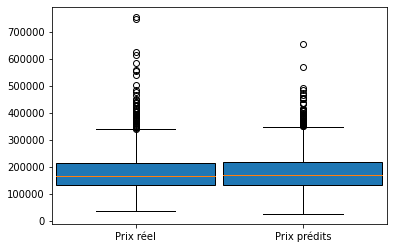

In [26]:
bp = pyplot.boxplot([list(df_new2['SalePrice']), list(mod.predict())], patch_artist = True, labels = ('Prix réel','Prix prédits'), widths=(0.95, 0.95))



<h1>On refait notre modèle avec 32 variables mais cette fois en splitant les données train et test pour prédire sur des données non entrainées</h1>

In [27]:
X = df_new2[['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'FirstFloor', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MSZoning', 'LotShape', 'LandContour', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'KitchenQual', 'Functional', 'SaleType', 'SaleCondition']]
y = df_new2[['SalePrice']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("Données modèle d'entrainement >",len(X_train))
print("Données modèle de test >",len(X_test))

Données modèle d'entrainement > 1060
Données modèle de test > 354


In [29]:
#merge des données train
df_train = X_train.merge(y_train, how='outer', left_index=True, right_index=True)

In [30]:
#modèle data train only  (quelques variables enlevées prcq y'a un bug chelou mais jcrois il manquait des données)
mod_train = smf.ols(formula='SalePrice ~ FirstFloor + LotArea + OverallQual + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + TotalBsmtSF + FirstFloor + GrLivArea + FullBath + TotRmsAbvGrd + Fireplaces + GarageCars + GarageArea+ BsmtQual + BsmtExposure+ KitchenQual + SaleCondition + MSZoning + LotShape + LandContour + Neighborhood + Condition1 + HouseStyle + ExterQual', data=df_train).fit()
#mod_train.summary()
#mod_train.predict(X_test) #on prédit nos price grace à X_test qui n'ont pas était train par le modèle

In [31]:
print(f"data train : {len(list(df_train.values))}")
print(f"X_test : {len(list(mod_train.predict(X_test)))}")
print(f"y_test : {len(list(y_test['SalePrice']))}")

data train : 1060
X_test : 354
y_test : 354


In [32]:
dif_pourcent_train_predict2 = []

for train,predict in zip(list(y_test['SalePrice']),list(mod_train.predict(X_test))):
    if train > predict:
        #print(round((train - predict) / predict * 100,2))
        dif_pourcent_train_predict2.append(round((train - predict) / predict * 100,2))
    else :
        #print(round((predict - train) / train * 100,2))
        dif_pourcent_train_predict2.append(round((predict - train) / train * 100,2))

print("En moyenne la différence entre les train prices et les predictions prices est de:",round(statistics.mean(dif_pourcent_train_predict2),2),"%")

En moyenne la différence entre les train prices et les predictions prices est de: 11.58 %


<h1>Au lieu de spliter nos données en plusieurs morceaux, on fait 2000 simus avec à chaque fois des données différentes</h1>

In [33]:
list_moy_pourcent = []

In [ ]:
for Null in range(1,2000):
    try:
        dif_pourcent_train_predict3 = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        df_train = X_train.merge(y_train, how='outer', left_index=True, right_index=True)
        mod_train = smf.ols(formula='SalePrice ~ FirstFloor + LotArea + OverallQual + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + TotalBsmtSF + FirstFloor + GrLivArea + FullBath + TotRmsAbvGrd + Fireplaces + GarageCars + GarageArea+ BsmtQual + BsmtExposure+ KitchenQual + SaleCondition + MSZoning + LotShape + LandContour + Neighborhood + Condition1 + HouseStyle + ExterQual', data=df_train).fit()
        for train,predict in zip(list(y_test['SalePrice']),list(mod_train.predict(X_test))):
            if train > predict:
                #print(round((train - predict) / predict * 100,2))
                dif_pourcent_train_predict3.append(round((train - predict) / predict * 100,2))
            else :
                #print(round((predict - train) / train * 100,2))
                dif_pourcent_train_predict3.append(round((predict - train) / train * 100,2))

        #print("En moyenne la différence entre les train prices et les predictions prices est de:",round(statistics.mean(dif_pourcent_train_predict3),5),"%")
        list_moy_pourcent.append(round(statistics.mean(dif_pourcent_train_predict3),2))
    except:
        pass

In [ ]:
print(f"La moyenne des 2000 moyennes est de : {round(statistics.mean(list_moy_pourcent),2)}%")